<a href="https://colab.research.google.com/github/YusufCanDemirkol/youtube-video-cover-classification/blob/main/Deit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision.datasets import ImageFolder
from torchvision import transforms
from transformers import DeiTForImageClassification
import time
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np
import seaborn as sns
from PIL import Image


In [ ]:
from google.colab import drive
import zipfile
import os

# Drive'ı mount et
drive.mount('/content/drive')

# Eğitim ve test veri seti dizinlerini ayarla
train_dir = "/content/drive/MyDrive/data/train"
test_dir = "/content/drive/MyDrive/data/test"

# Çıkartma dizinleri
train_extract_dir = "/content/train"
test_extract_dir = "/content/test"

# ZIP dosyalarını çıkaran bir fonksiyon
def extract_zip_files(source_dir, target_dir):
    os.makedirs(target_dir, exist_ok=True)  # Çıkarılacak dizini oluştur
    for file_name in os.listdir(source_dir):
        if file_name.endswith(".zip"):
            with zipfile.ZipFile(os.path.join(source_dir, file_name), 'r') as zip_ref:
                zip_ref.extractall(target_dir)

# Eğitim ve test ZIP dosyalarını çıkar
extract_zip_files(train_dir, train_extract_dir)
extract_zip_files(test_dir, test_extract_dir)
print("ZIP dosyaları başarıyla çıkarıldı!")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
ZIP dosyaları başarıyla çıkarıldı!


In [ ]:
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision import transforms

# Dönüşüm (normalize edilmiş tensorler)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Veri setlerini oluştur
train_dataset = ImageFolder(root=train_extract_dir, transform=transform)
test_dataset = ImageFolder(root=test_extract_dir, transform=transform)

# Veri yükleyicileri
batch_size = 64  # Batch size belirle
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Sınıfları kontrol et
print("Sınıflar:", train_dataset.classes)


Sınıflar: ['belgeseltrain', 'derstrain', 'oyuntrain', 'sportrain', 'yemektrain']


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = DeiTForImageClassification.from_pretrained(
    "facebook/deit-base-distilled-patch16-224",
    num_labels=5  # 5 sınıf
)
model.to(device)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/69.6k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/349M [00:00<?, ?B/s]

Some weights of DeiTForImageClassification were not initialized from the model checkpoint at facebook/deit-base-distilled-patch16-224 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


DeiTForImageClassification(
  (deit): DeiTModel(
    (embeddings): DeiTEmbeddings(
      (patch_embeddings): DeiTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): DeiTEncoder(
      (layer): ModuleList(
        (0-11): 12 x DeiTLayer(
          (attention): DeiTSdpaAttention(
            (attention): DeiTSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): DeiTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): DeiTIntermediate(
            (dense): L

In [ ]:
criterion = nn.CrossEntropyLoss()  # Sınıflandırma kaybı
optimizer = optim.Adam(model.parameters(), lr=1e-5)  # Adam optimizasyonu


In [ ]:
training_start_time = time.time()


Epoch 1/20, Training Loss: 0.2501, Validation Loss: 0.1608, Epoch Time: 852.67 seconds
Best model saved at epoch 1 with Validation Loss: 0.1608
Epoch 2/20, Training Loss: 0.0419, Validation Loss: 0.1582, Epoch Time: 854.32 seconds
Best model saved at epoch 2 with Validation Loss: 0.1582
Epoch 3/20, Training Loss: 0.0140, Validation Loss: 0.1618, Epoch Time: 854.52 seconds
Epoch 4/20, Training Loss: 0.0100, Validation Loss: 0.1711, Epoch Time: 854.40 seconds
Epoch 5/20, Training Loss: 0.0078, Validation Loss: 0.1895, Epoch Time: 855.31 seconds
Epoch 6/20, Training Loss: 0.0028, Validation Loss: 0.1870, Epoch Time: 854.57 seconds
Epoch 7/20, Training Loss: 0.0012, Validation Loss: 0.1888, Epoch Time: 853.62 seconds
Epoch 8/20, Training Loss: 0.0010, Validation Loss: 0.1925, Epoch Time: 854.61 seconds
Early stopping triggered! Validation loss did not improve for 6 consecutive epochs.
Total Training Time: 6835.62 seconds


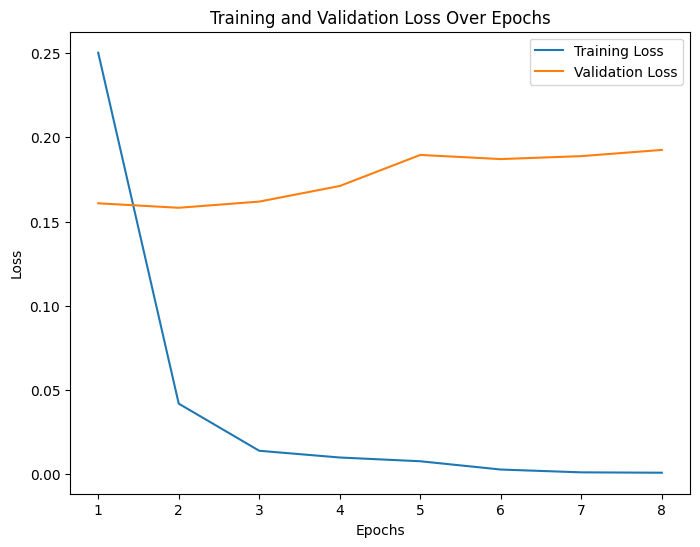

In [ ]:
from torch.optim import AdamW
from torch.optim.lr_scheduler import CosineAnnealingLR
import torch.nn as nn
import time

# Optimizasyon ve Weight Decay
optimizer = AdamW(model.parameters(), lr=1e-4, weight_decay=1e-3)

# Learning Rate Scheduler
scheduler = CosineAnnealingLR(optimizer, T_max=10)

# Dropout Uygulaması (modelde varsa uygulanır)
if hasattr(model, "dropout"):
    model.dropout = nn.Dropout(p=0.3)

epochs = 20  # Epoch sayısı artırıldı
train_losses = []
val_losses = []

# En iyi model ve early stopping değişkenleri
best_val_loss = float("inf")
patience = 6  # Maksimum tolerans epoch sayısı
patience_counter = 0  # Epoch sayacı

# Toplam eğitim süresi başlangıcı
training_start_time = time.time()

for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    # Her epoch için zaman ölçümü başlat
    epoch_start_time = time.time()

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images).logits
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    # Doğrulama kaybını hesapla
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images).logits
            loss = criterion(outputs, labels)
            val_loss += loss.item()

    val_loss /= len(test_loader)
    val_losses.append(val_loss)

    # Learning rate scheduler
    scheduler.step()

    # Epoch süresini hesapla
    epoch_end_time = time.time()
    epoch_time = epoch_end_time - epoch_start_time

    print(f"Epoch {epoch+1}/{epochs}, Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, Epoch Time: {epoch_time:.2f} seconds")

    # En iyi doğrulama kaybını kontrol et
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        torch.save(model.state_dict(), "/content/drive/MyDrive/best_model_Deit.pth")  # En iyi modeli kaydet
        print(f"Best model saved at epoch {epoch+1} with Validation Loss: {best_val_loss:.4f}")
    else:
        patience_counter += 1

    # Early stopping kontrolü
    if patience_counter >= patience:
        print(f"Early stopping triggered! Validation loss did not improve for {patience} consecutive epochs.")
        break

# Toplam eğitim süresi
training_end_time = time.time()
total_training_time = training_end_time - training_start_time

print(f"Total Training Time: {total_training_time:.2f} seconds")

# Eğitim kaybını görselleştirme
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(train_losses) + 1), train_losses, label="Training Loss")
plt.plot(range(1, len(val_losses) + 1), val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss Over Epochs")
plt.show()



Inference Time: 71.00 seconds
Accuracy: 0.9598
Recall (Sensitivity): 0.9595
Precision: 0.9589
Specificity: 0.9899
F1-Score: 0.9592
AUC: 0.9747


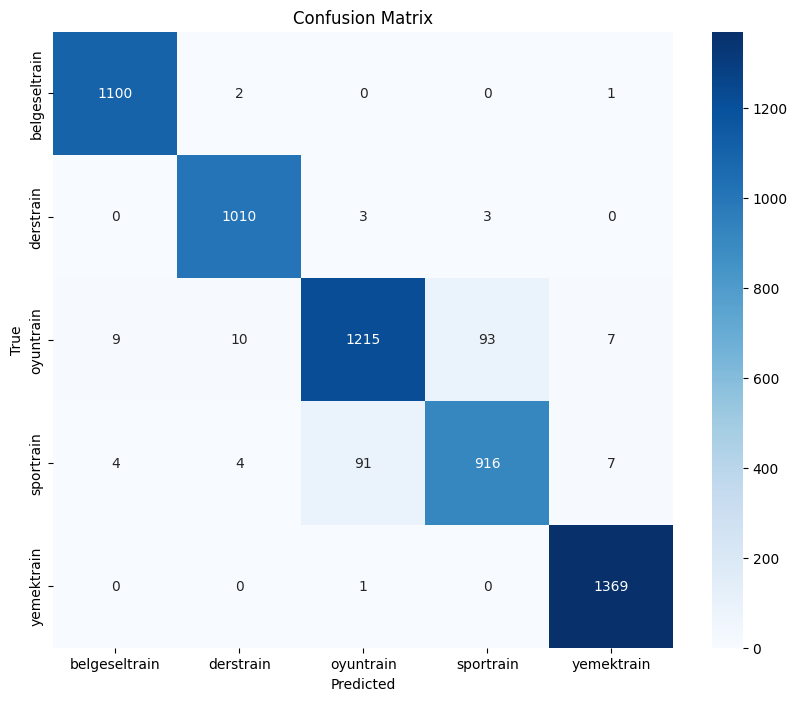

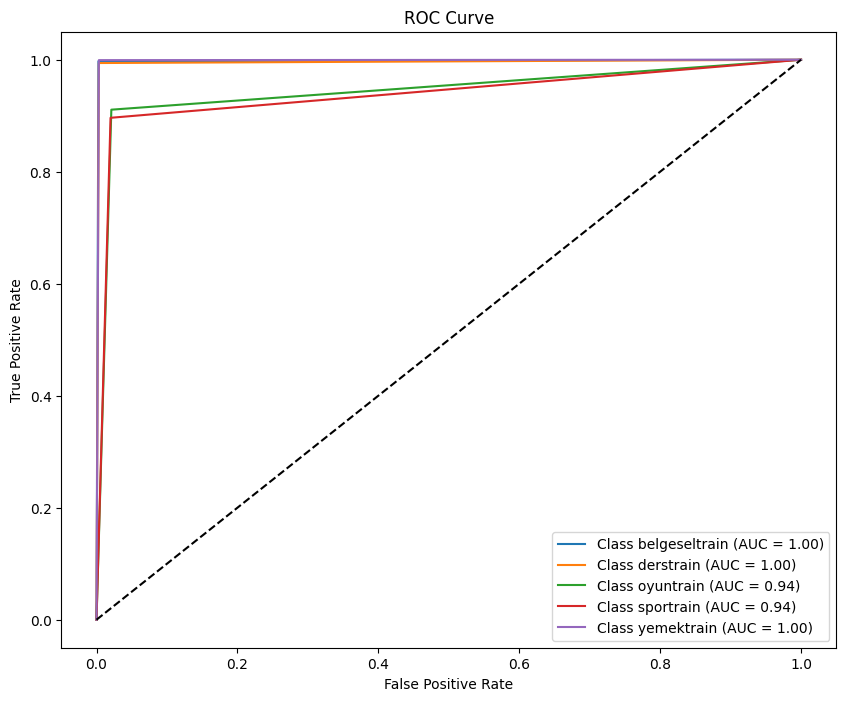

In [ ]:
import torch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

# Modeli değerlendir
model.eval()

# Çıkarım zamanı ölçümü için zamanlayıcı
inference_start_time = time.time()

# Test veri kümesi tahminleri ve etiketler
all_labels = []
all_preds = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images).logits
        _, preds = torch.max(outputs, 1)  # Tahmin edilen sınıflar
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())

inference_end_time = time.time()
inference_time = inference_end_time - inference_start_time

# Çıkarım Zamanı
print(f"Inference Time: {inference_time:.2f} seconds")

# Accuracy
accuracy = accuracy_score(all_labels, all_preds)
print(f"Accuracy: {accuracy:.4f}")

# Recall (Sensitivity) ve Precision
recall = recall_score(all_labels, all_preds, average='macro')  # Makro ortalama
precision = precision_score(all_labels, all_preds, average='macro')  # Makro ortalama
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Precision: {precision:.4f}")

# Specificity Hesaplama
cm = confusion_matrix(all_labels, all_preds)
specificity = []
for i in range(len(cm)):
    tn = np.sum(cm) - (np.sum(cm[i, :]) + np.sum(cm[:, i]) - cm[i, i])  # True Negatives
    fp = np.sum(cm[:, i]) - cm[i, i]  # False Positives
    specificity.append(tn / (tn + fp))
specificity_mean = float(np.mean(specificity))
print(f"Specificity: {specificity_mean:.4f}")

# F1-Score
f1 = f1_score(all_labels, all_preds, average='macro')
print(f"F1-Score: {f1:.4f}")

# AUC (Area Under Curve)
all_labels_bin = label_binarize(all_labels, classes=range(len(train_dataset.classes)))
all_preds_bin = label_binarize(all_preds, classes=range(len(train_dataset.classes)))
auc_value = roc_auc_score(all_labels_bin, all_preds_bin, average='macro', multi_class="ovr")
print(f"AUC: {auc_value:.4f}")

# Karmaşıklık Matrisi Görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=train_dataset.classes, yticklabels=train_dataset.classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# ROC Eğrisi
fpr = {}
tpr = {}
roc_auc = {}

for i in range(len(train_dataset.classes)):
    fpr[i], tpr[i], _ = roc_curve(all_labels_bin[:, i], all_preds_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(len(train_dataset.classes)):
    plt.plot(fpr[i], tpr[i], label=f"Class {train_dataset.classes[i]} (AUC = {roc_auc[i]:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
